# 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 02. Import dataset

In [2]:
path = r'C:\Users\Logan\OneDrive\Desktop\Instacart Basket Analysis'
path

'C:\\Users\\Logan\\OneDrive\\Desktop\\Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8_task_ords_prods_merge_grouping data'))

In [4]:
ords_prods_merge.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [5]:
ords_prods_merge.shape

(32404859, 24)

# Creating Bar Charts

<AxesSubplot:>

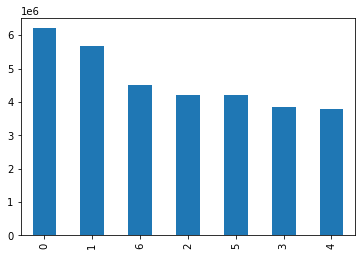

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

In [7]:
# sort by day of week
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

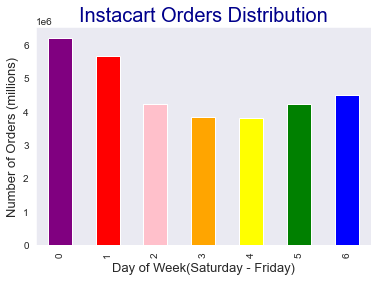

In [8]:
sns.set_style('dark')
# sort by day of week -> bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(
    color=['purple', 'red', 'pink', 'orange','yellow','green', 'blue'])
#title
plt.title("Instacart Orders Distribution", fontsize = 20, color='DarkBlue',fontname='Arial')
#show legend
#plt.legend()
#axes labels
plt.xlabel('Day of Week(Saturday - Friday)', fontsize = 13,fontname = 'Arial')
plt.ylabel('Number of Orders (millions)',fontsize = 13,fontname = 'Arial')
# no text
plt.show()

# Exporting Charts

In [9]:
bar.figure.savefig(os.path.join(path, 
    '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

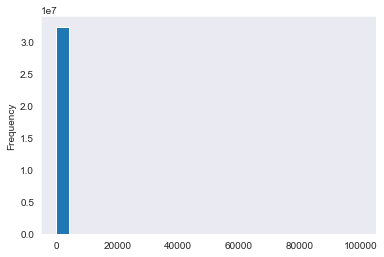

In [10]:
#Histogram
ords_prods_merge['prices'].plot.hist(bins=25)
plt.show()

In [11]:
# histogram is "broken"
# price cannot be 99999
ords_prods_merge['prices'].max()

99999.0

---

In [12]:
#Scatterplots

<AxesSubplot:xlabel='prices', ylabel='prices'>

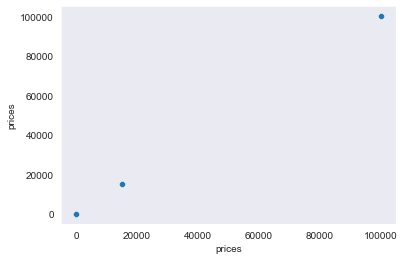

In [13]:
sns.scatterplot(data=ords_prods_merge, x= 'prices', y= 'prices')

In [14]:
# filter items above 100
filt = ords_prods_merge['prices'] > 100

In [15]:
# identify outliers
ords_prods_merge.loc[filt, 'prices'].value_counts()

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [16]:
# mark outliers as missing NaN
ords_prods_merge.loc[filt, 'prices'] = np.nan

In [17]:
# make sure prices outliers are removed
ords_prods_merge['prices'].max()

25.0

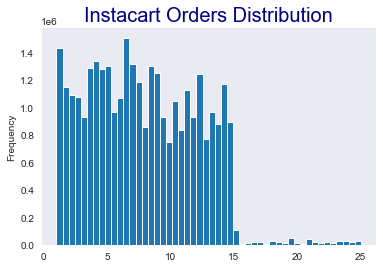

In [18]:
# histogram
imagehist = ords_prods_merge['prices'].plot.hist(bins =50)
plt.title("Instacart Orders Distribution", fontsize = 20, color='DarkBlue',fontname='Arial')
#show legend
#plt.legend()
# no text
plt.show()

In [19]:
imagehist.figure.savefig(os.path.join(path, 
    '04 Analysis','Visualizations', 'hist_prices.png'))

---

# Creating Line Charts

In [20]:
np.random.rand(5)

array([0.95425681, 0.33442453, 0.94440058, 0.22070183, 0.14946156])

In [21]:
# Sampling Data
np.random.seed(4)

In [22]:
# Create a list holding True/False values to the test np.random.rand() <= .7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# Split dataframe into 2 samples

In [24]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [25]:
small.shape

(9721098, 24)

In [26]:
big.shape

(22683761, 24)

In [27]:
len(big) + len(small)

32404859

In [28]:
len(ords_prods_merge)

32404859

In [29]:
# line chart

In [30]:
# create new data frame for line chart with only columns we need
df2 = small[['order_day_of_week', 'prices']]

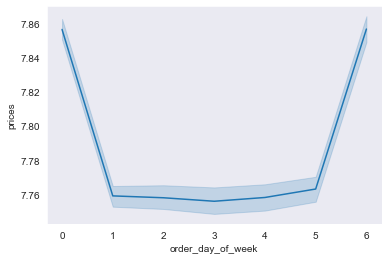

In [31]:
line = sns.lineplot(data = df2, x ='order_day_of_week', y ='prices')

In [32]:
small.shape

(9721098, 24)

In [34]:
small.drop(columns = '_merge', inplace=True)

In [35]:
small.shape

(9721098, 23)

In [36]:
#Export sample of data
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_merge_sample'))